<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-окупаемость-рекламы" data-toc-modified-id="Общая-окупаемость-рекламы-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая окупаемость рекламы</a></span></li><li><span><a href="#Окупаемость-рекламы-с-разбивкой-по-устройствам" data-toc-modified-id="Окупаемость-рекламы-с-разбивкой-по-устройствам-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Окупаемость рекламы с разбивкой по устройствам</a></span></li><li><span><a href="#Окупаемость-рекламы-с-разбивкой-по-странам" data-toc-modified-id="Окупаемость-рекламы-с-разбивкой-по-странам-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Окупаемость рекламы с разбивкой по странам</a></span></li><li><span><a href="#Окупаемость-рекламы-с-разбивкой-по-рекламным-каналам" data-toc-modified-id="Окупаемость-рекламы-с-разбивкой-по-рекламным-каналам-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Окупаемость рекламы с разбивкой по рекламным каналам</a></span></li></ul></div>

# Исследование окупаемости рекалмных компаний по странам, каналам привлечения и устройствам.

В моем распоряжении данные данные о визитах, покупках и затратах на маркетинг за период с 2019-05-01 по 2019-10-27. Нужно проанализировать затраты в разрезе по устройствам, регионам и каналам привлечения. Выяснить причины убытков, посчитать ударжание, конверсию,  LTV, CAC и ROI. Продумать рекомендации по повышению окупаемости. 

# Шаг 1. Загружаем данные и подготавливаем их к анализу

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# загружаем данные
visits = pd.read_csv('/datasets/visits_info_short.csv')

orders = pd.read_csv('/datasets/orders_info_short.csv')

costs = pd.read_csv('/datasets/costs_info_short.csv')

visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  
    pd.read_csv('/datasets/orders_info_short.csv'),  
    pd.read_csv('/datasets/costs_info_short.csv'),  
)
pd.set_option('display.float_format', '{:.3f}'.format)

In [3]:
#функция для вывода данных
def data(dataframes):
    dataframes.columns = [x.lower().replace(' ', '_') for x in dataframes.columns.values]
    for column in dataframes.columns:
        print('====================')
        print(column)
        print(dataframes[column].value_counts())
        print(dataframes[column].unique())
    print(dataframes.info())
    dataframes.describe()
    display(dataframes.head())

Нужно привести названия столбцов к нижнему регистру и сменить тип данных в столбцах с датой

In [4]:
data(visits)

user_id
33606575057     46
943775408561    36
901180916748    35
870784569391    34
764086596354    33
                ..
350468480225     1
748123264144     1
909267360937     1
816252757222     1
425788122907     1
Name: user_id, Length: 150008, dtype: int64
[981449118918 278965908054 590706206550 ... 519022174024 354394066496
 279181973476]
region
United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64
['United States' 'UK' 'France' 'Germany']
device
iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64
['iPhone' 'Mac' 'Android' 'PC']
channel
organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dt

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Аналогично вышенаписанному.

In [5]:
data(orders)

user_id
901180916748    22
883098437811    20
75337957494     19
512471511263    19
295795879965    19
                ..
237296010927     1
319939546352     1
742075710598     1
202972423389     1
775233404832     1
Name: user_id, Length: 8881, dtype: int64
[188246423999 174361394180 529610067795 ... 492983055500 651604369137
 168548862926]
event_dt
2019-10-26 09:20:21    2
2019-09-11 00:53:54    2
2019-09-24 03:34:47    2
2019-06-17 05:14:58    2
2019-09-29 09:03:24    2
                      ..
2019-08-20 21:21:39    1
2019-10-29 01:52:49    1
2019-07-03 11:04:56    1
2019-06-10 03:18:21    1
2019-05-31 23:47:09    1
Name: event_dt, Length: 40163, dtype: int64
['2019-05-01 23:09:52' '2019-05-01 12:24:04' '2019-05-01 11:34:04' ...
 '2019-10-31 06:17:29' '2019-10-31 22:46:19' '2019-10-31 13:29:06']
revenue
4.990     38631
5.990       780
9.990       385
49.990      212
19.990      204
Name: revenue, dtype: int64
[ 4.99  5.99  9.99 49.99 19.99]
<class 'pandas.core.frame.DataFrame'>
Ran

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.990
1,174361394180,2019-05-01 12:24:04,4.990
2,529610067795,2019-05-01 11:34:04,4.990
3,319939546352,2019-05-01 15:34:40,4.990
4,366000285810,2019-05-01 13:59:51,4.990


In [6]:
data(costs)

dt
2019-08-07    10
2019-05-23    10
2019-05-18    10
2019-06-04    10
2019-09-12    10
              ..
2019-09-27    10
2019-08-06    10
2019-06-21    10
2019-08-25    10
2019-08-23    10
Name: dt, Length: 180, dtype: int64
['2019-05-01' '2019-05-02' '2019-05-03' '2019-05-04' '2019-05-05'
 '2019-05-06' '2019-05-07' '2019-05-08' '2019-05-09' '2019-05-10'
 '2019-05-11' '2019-05-12' '2019-05-13' '2019-05-14' '2019-05-15'
 '2019-05-16' '2019-05-17' '2019-05-18' '2019-05-19' '2019-05-20'
 '2019-05-21' '2019-05-22' '2019-05-23' '2019-05-24' '2019-05-25'
 '2019-05-26' '2019-05-27' '2019-05-28' '2019-05-29' '2019-05-30'
 '2019-05-31' '2019-06-01' '2019-06-02' '2019-06-03' '2019-06-04'
 '2019-06-05' '2019-06-06' '2019-06-07' '2019-06-08' '2019-06-09'
 '2019-06-10' '2019-06-11' '2019-06-12' '2019-06-13' '2019-06-14'
 '2019-06-15' '2019-06-16' '2019-06-17' '2019-06-18' '2019-06-19'
 '2019-06-20' '2019-06-21' '2019-06-22' '2019-06-23' '2019-06-24'
 '2019-06-25' '2019-06-26' '2019-06-27' '2019-06

,dt,channel,costs
0,2019-05-01,FaceBoom,113.300
1,2019-05-02,FaceBoom,78.100
2,2019-05-03,FaceBoom,85.800
3,2019-05-04,FaceBoom,136.400
4,2019-05-05,FaceBoom,122.100


In [7]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [8]:
display(visits, orders, costs )

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.990
1,174361394180,2019-05-01 12:24:04,4.990
2,529610067795,2019-05-01 11:34:04,4.990
3,319939546352,2019-05-01 15:34:40,4.990
4,366000285810,2019-05-01 13:59:51,4.990
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.990
40208,275341387049,2019-10-31 01:17:17,4.990
40209,374656616484,2019-10-31 06:17:29,4.990
40210,168548862926,2019-10-31 22:46:19,4.990


,dt,channel,costs
0,2019-05-01,FaceBoom,113.300
1,2019-05-02,FaceBoom,78.100
2,2019-05-03,FaceBoom,85.800
3,2019-05-04,FaceBoom,136.400
4,2019-05-05,FaceBoom,122.100
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.000
1796,2019-10-24,lambdaMediaAds,6.400
1797,2019-10-25,lambdaMediaAds,8.800
1798,2019-10-26,lambdaMediaAds,8.800


# Шаг 2. Функции для расчета и анализа LTV, ROI, удержания и конверсии

***Профили пользователей***

In [9]:
def get_profiles(sessions, orders, ad_costs):
    # Шаг 1. Передадим в функцию расчета профиля данные о рекламных затратах (фрейм ad_costs)
    
    # сортируем сессии по id пользователя и дате для того,чтобы работал first
    # находим первые значения для параметров пользователя - будем считать их основными 
    profiles = (sessions.sort_values(by = ['user_id', 'session_start'])           
                        .groupby('user_id').agg({'session_start' : 'first',       
                                                 'channel': 'first',
                                                 'device': 'first',
                                                 'region': 'first'})                                 
                        .rename(columns = {'session_start' : 'first_ts'})  
                        .reset_index()  # вернем все данные из индекса в колонки                                           
               )
    # определим дату первого посещеня 
    # и начало месяца первого посещения - они понадобятся нам при когортном анализе
    profiles['dt'] = profiles['first_ts'].dt.date                                 
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')     
    
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())   
            
    # Шаг 2. К данным о рекламных затратах добавим количества привлеченных пользователей
    new_users = profiles.groupby(['dt', 'channel']).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'unique_users'}).reset_index()
    ad_costs = ad_costs.merge(new_users, on = ['dt', 'channel'], how = 'left')
    
    # Шаг 3. Найдем среднюю стоимость привлечения пользователя
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # Шаг 4. Присоединим данные к профилям пользователей информацию о средней стоимости привлечения в день привлечения пользователя из нужного источника
    profiles = profiles.merge(ad_costs[['dt', 'channel', 'acquisition_cost']], on = ['dt', 'channel'], how = 'left')
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0) # органические пользователи будут стоить 0
    
    return profiles

***Удержание***

In [10]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

***Конверсия***

In [11]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

***LTV и ROI***

In [12]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

***Сглаживание фрейма***

In [13]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

***Визуализация удержания***

In [14]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

***Визуализация конверсии***

In [15]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

***Визуализация LTV и ROI***

In [16]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

# Шаг 3. Исследовательский анализ данных

In [17]:
# строим профили пользователей
profiles = get_profiles(visits, orders, costs)
# вычисляем минимальную дату
profiles['dt'].min() 

datetime.date(2019, 5, 1)

In [18]:
# вычисляем максимальную дату
profiles['dt'].max()

datetime.date(2019, 10, 27)

In [19]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.231


In [20]:
# группируем по стране и вычисляем долю платящих пользователей
profiles.groupby('region').agg({'payer': 'mean', 'user_id' : 'nunique'}).sort_values(by = 'payer', ascending = False)


,payer,user_id
region,,
United States,0.069,100002
Germany,0.041,14981
UK,0.040,17575
France,0.038,17450


И по количеству и по доле платящих пользователей лидер США.

In [21]:
# группируем по устройству и вычисляем долю платящих пользователей

profiles.groupby('device').agg({'payer': 'mean', 'user_id' : 'nunique'}).sort_values(by = 'payer', ascending = False)

,payer,user_id
device,,
Mac,0.064,30042
iPhone,0.062,54479
Android,0.059,35032
PC,0.050,30455


Максимальное количество пользователей заходит с iPhone. Доля платящих выше для пользователей Mac.

In [22]:
# группируем по каналу и вычисляем долю платящих пользователей
profiles.groupby('channel').agg({'payer': 'mean', 'user_id' : 'nunique'}).sort_values(by = 'payer', ascending = False)

,payer,user_id
channel,,
FaceBoom,0.122,29144
AdNonSense,0.113,3880
lambdaMediaAds,0.105,2149
TipTop,0.096,19561
RocketSuperAds,0.079,4448
WahooNetBanner,0.053,8553
YRabbit,0.038,4312
MediaTornado,0.036,4364
LeapBob,0.031,8553


В лидерах FaceBoom, AdNonSense, lambdaMediaAds.

In [23]:
# заморочился в целях посмотреть разбивку по каналам и девайсам
profiles.pivot_table(
    index='channel', columns='device', values='payer', aggfunc='mean')

device,Android,Mac,PC,iPhone
channel,,,,
AdNonSense,0.106,0.095,0.123,0.114
FaceBoom,0.133,0.122,0.119,0.118
LeapBob,0.034,0.031,0.031,0.024
MediaTornado,0.034,0.040,0.038,0.034
OppleCreativeMedia,0.021,0.039,0.027,0.031
RocketSuperAds,0.058,0.085,0.071,0.088
TipTop,0.105,0.091,0.101,0.094
WahooNetBanner,0.058,0.047,0.054,0.046
YRabbit,0.046,0.037,0.041,0.034


# Шаг 4. Маркетинг

In [24]:
'Общая сумма расходов на маркетинг составила:', round(costs['costs'].sum(), 2)

('Общая сумма расходов на маркетинг составила:', 105497.3)

In [25]:
# группируем по каналам привлечения и суммируем затраты
total_cost = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by = 'costs', ascending = False)
total_cost.round(1)

,costs
channel,
TipTop,54751.300
FaceBoom,32445.600
WahooNetBanner,5151.000
AdNonSense,3911.200
OppleCreativeMedia,2151.200
RocketSuperAds,1833.000
LeapBob,1797.600
lambdaMediaAds,1557.600
MediaTornado,954.500


В лидерах по затратам на маркетинг TipTop и FaceBoom

In [26]:
profiles = profiles.query('channel != "organic"')
cac = (
    profiles
    .agg({'acquisition_cost': 'mean'})
        )

'Средний САС по всем каналам', cac

('Средний САС по всем каналам',
 acquisition_cost   1.127
 dtype: float64)

In [27]:
# считаем средний CAC по каналам привлечения

cac = (
    profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
    .sort_values(by = 'cac', ascending = False)
)

cac

,cac
channel,
TipTop,2.799
FaceBoom,1.113
AdNonSense,1.008
lambdaMediaAds,0.725
WahooNetBanner,0.602
RocketSuperAds,0.412
OppleCreativeMedia,0.250
YRabbit,0.219
MediaTornado,0.219


Самые высокие затраты на пользователя по каналам TipTop, AdNonSense, FaceBoom.

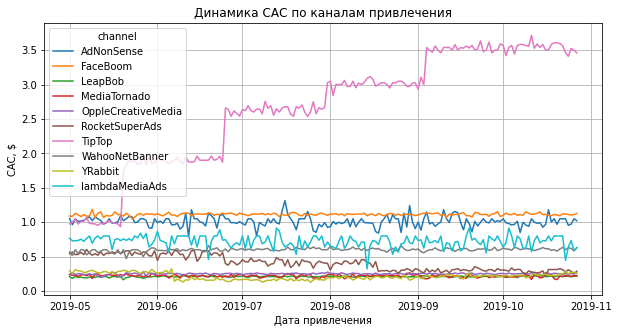

In [28]:
# строим график истории изменений CAC по каналам привлечения

profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

График к тому же показывает,что траты на канал ТипТоп изначально были на уровне ФейсБума и ЭдНонСенсе, но в дальнейшем затраты на канал только увеличивались.

# Шаг 5. Окупаемость рекламы для привлечения пользователей

### Общая окупаемость рекламы

In [29]:
# profiles = profiles.query('channel != "organic"')
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

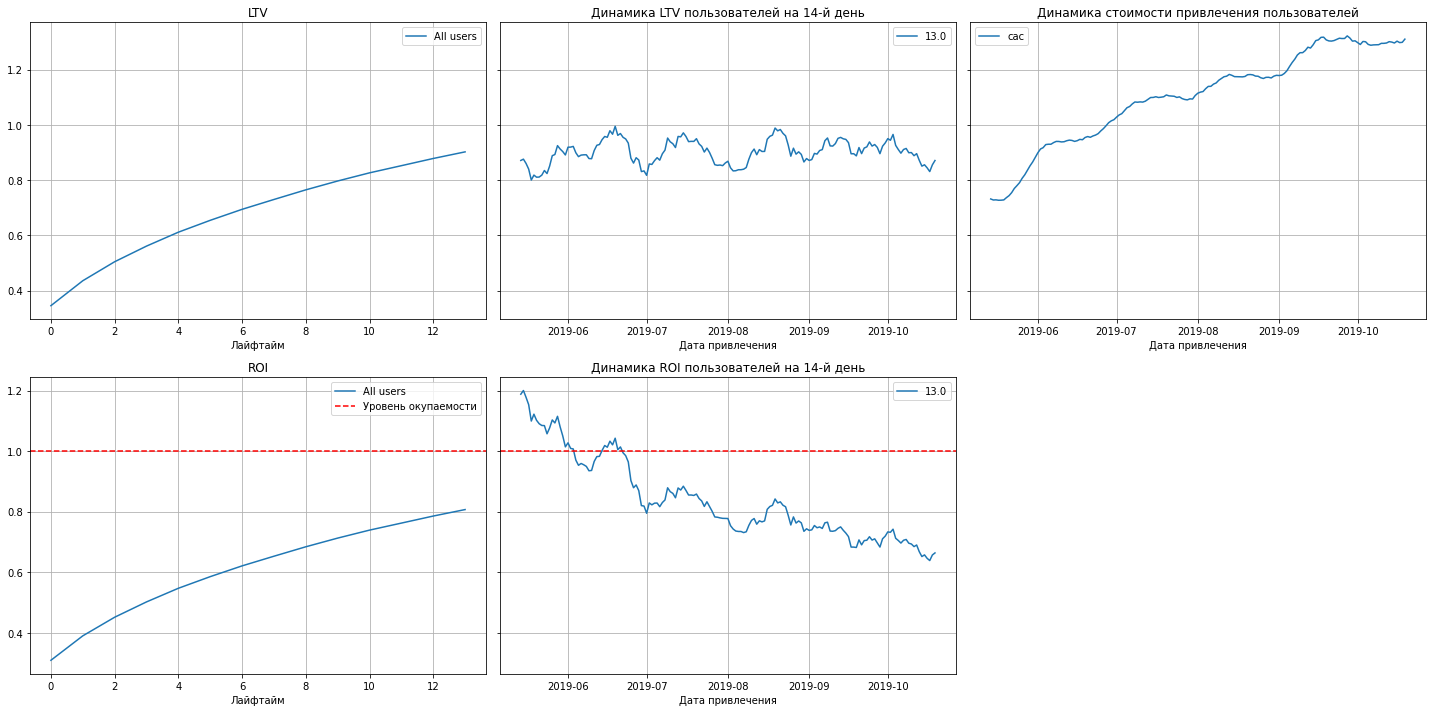

In [30]:
# смотрим окупаемость 

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Реклама в целом по всем каналам не окупается. При в целом стабильном LTV стоимость привлечения пользователей скачкообразно растет, как следствие падает окупаемость. 

### Окупаемость рекламы с разбивкой по устройствам

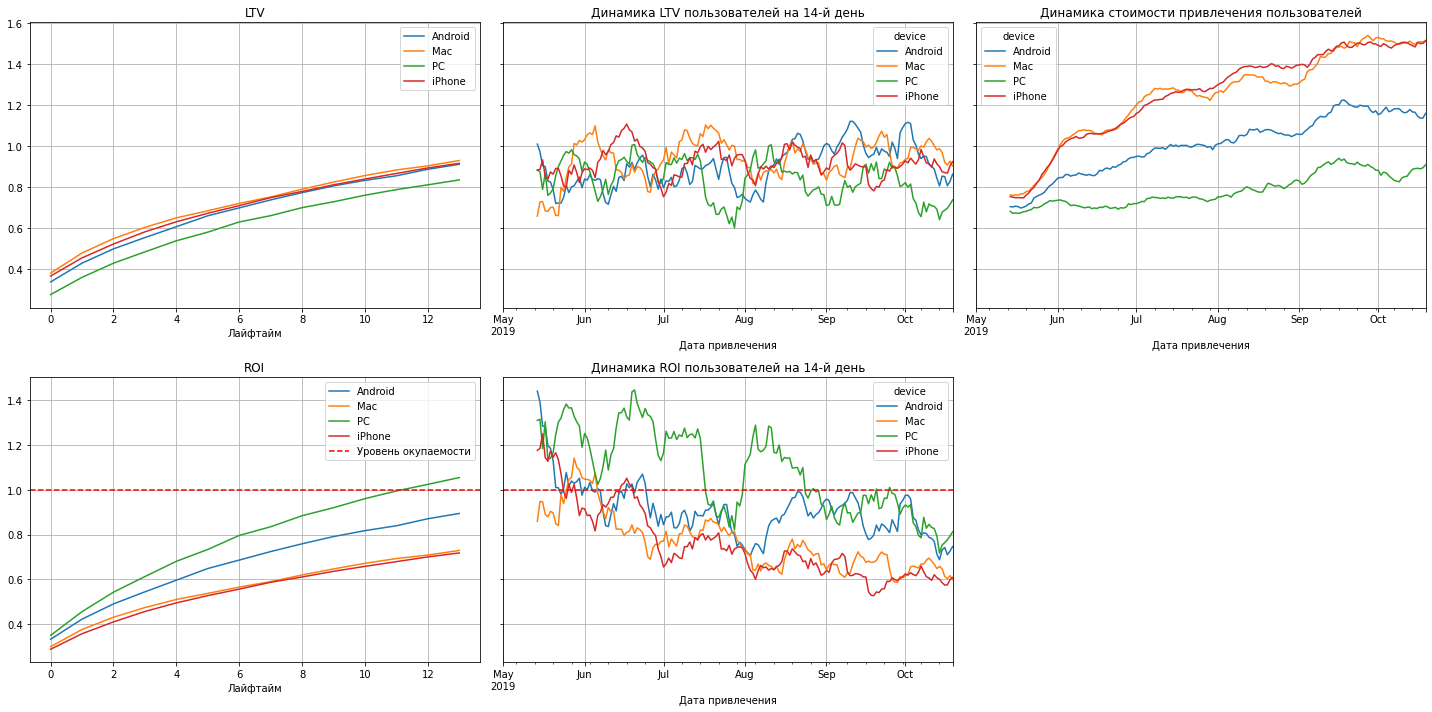

In [31]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Картина окупаемости исходя из устройства схожая с общей окупаемостью, за исключением того, что затраты на рекламу окупаемы по пользователям PC к 14-му дню.

### Окупаемость рекламы с разбивкой по странам

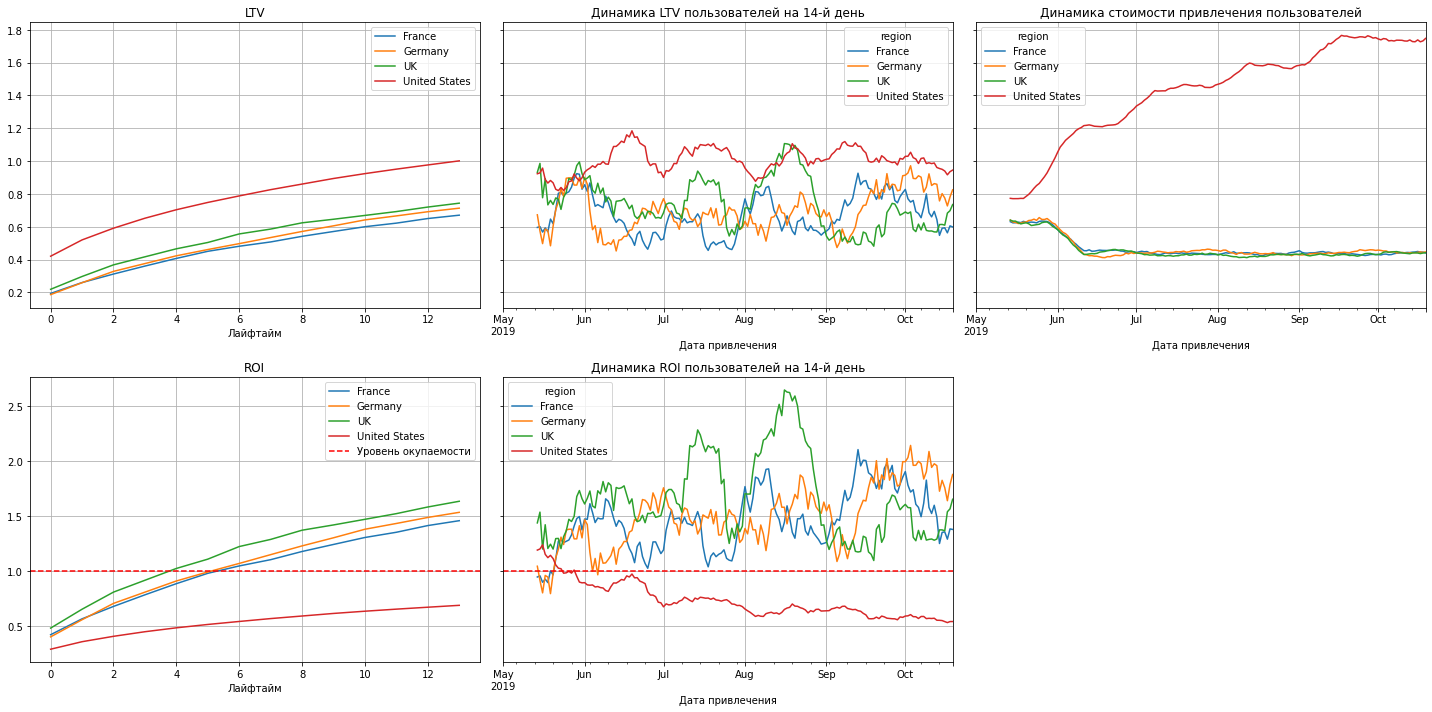

In [32]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Стоимость привелечения пользователей в США постоянно растет, что однако не сказывается на окупаемости, По европейским странам САС стабилен, затраты на рекламу окупаются. То есть убытки приносят только пользователи США, 

### Окупаемость рекламы с разбивкой по рекламным каналам

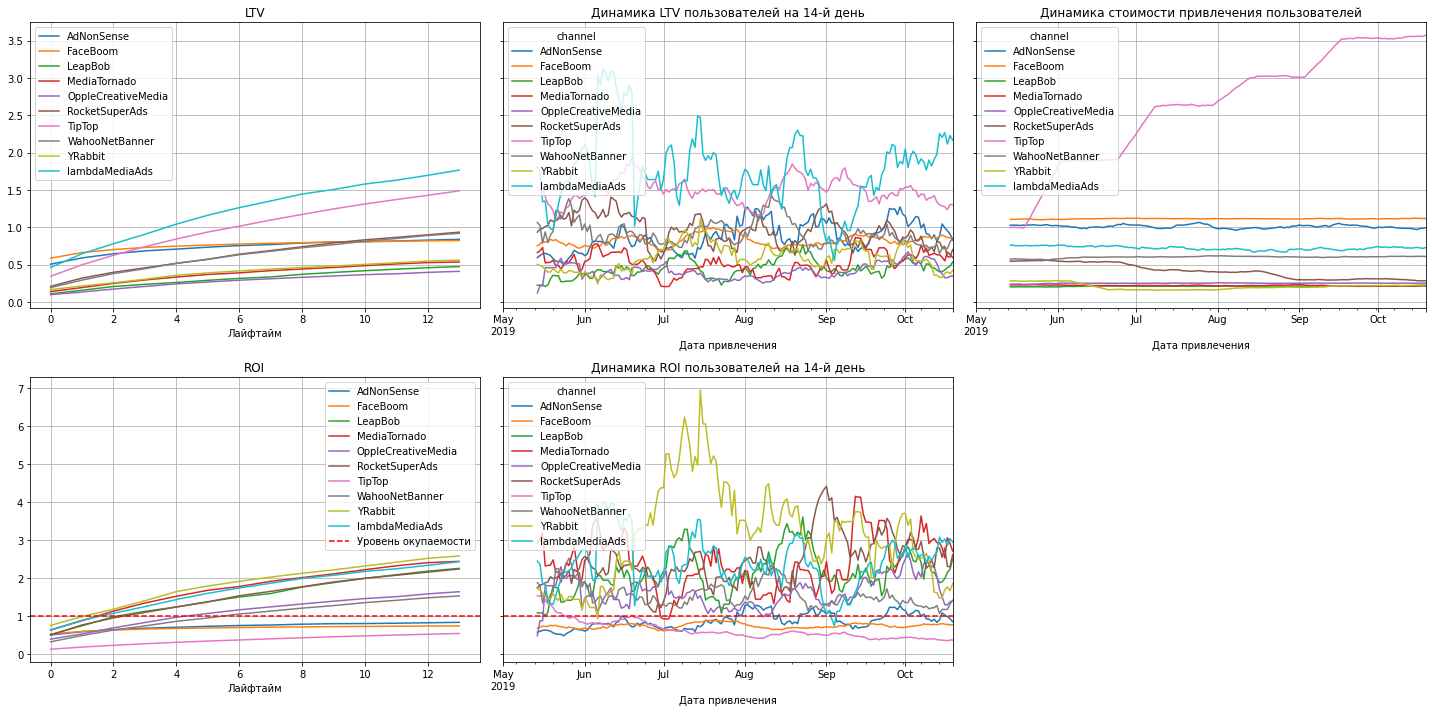

In [33]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Затраты по каналу TipTop излишни и не приводят к пропорциональному росту окупаемости. Не окупаются также затраты на рекламу по каналам ADNoneSense и FaceBoom. 

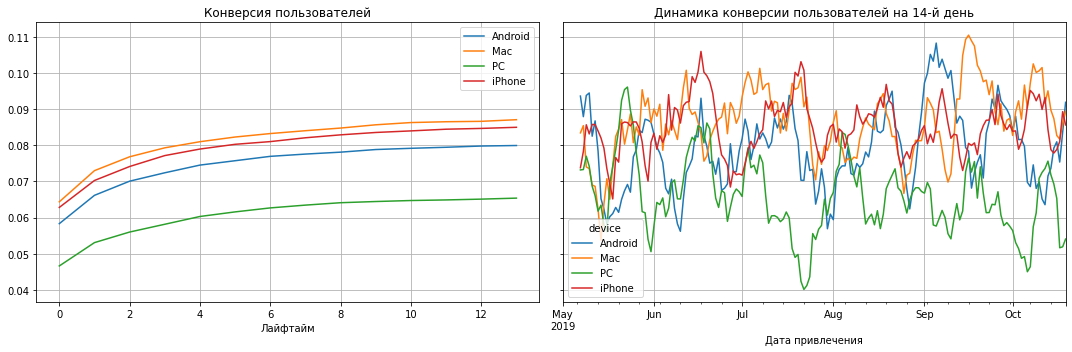

In [34]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']


conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Наибольшая конверсия по iPhоne и Mac. Что однако не ведет к окупаемости. Видна связь между увеличением трат по каналу TipTop  в январе и увеличением конверсии по пользователям iPhоne и Mac. Дальнейшее увеличение расходов не приводит к такому же росту, конврсия в целом дальше стабильна.

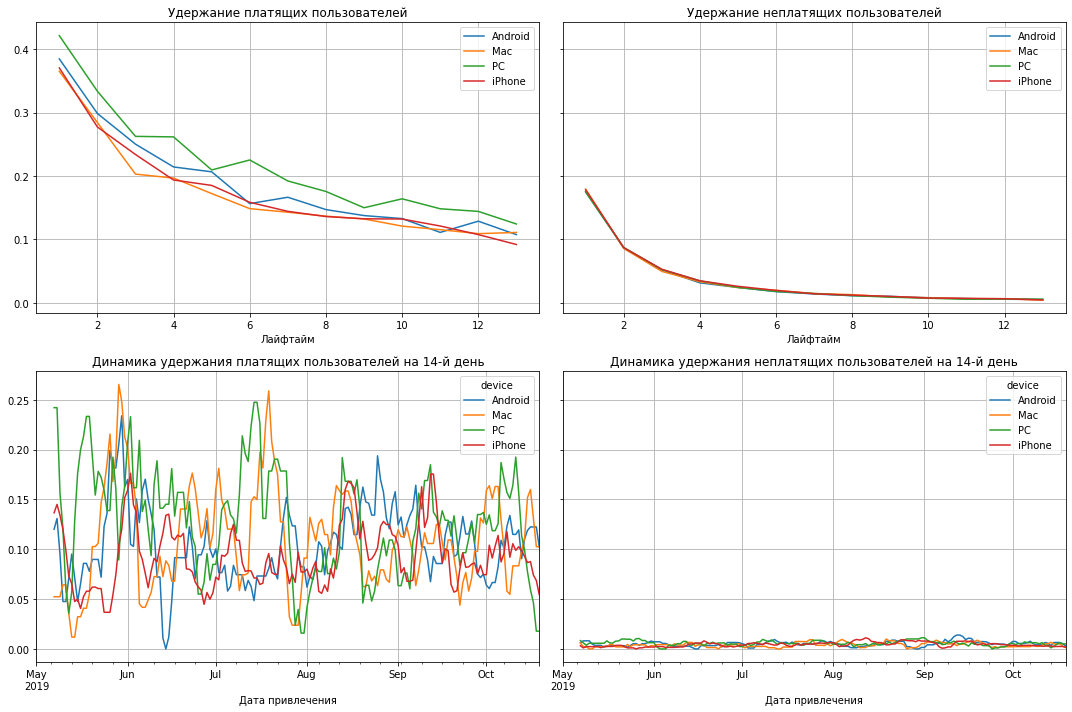

In [35]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']


retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days,dimensions=dimensions

)

plot_retention(retention_grouped, retention_history, horizon_days) 

Не смотря на более низкую конверсию пользователей PC удерживаются они лучше других пользователей в разрезе по устройствам.

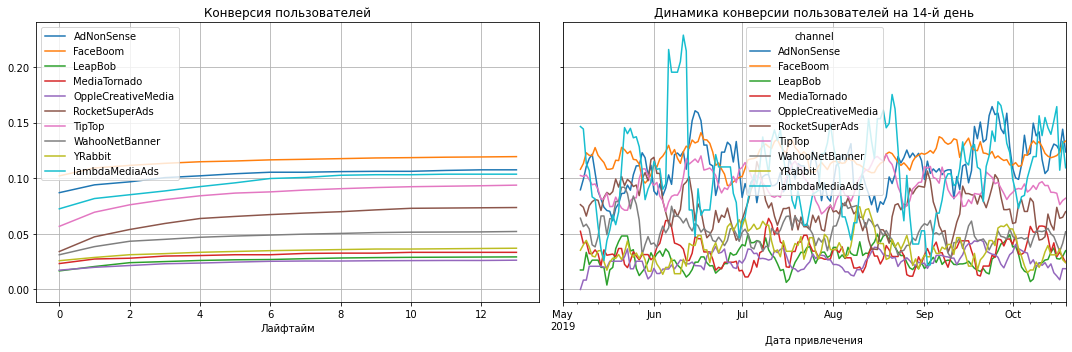

In [36]:
# смотрим конверсию с разбивкой по каналам
dimensions = ['channel']


conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

В лидерах каналы ADNonSense, LambdaMediaAds, FaceBoom, TipTop. 

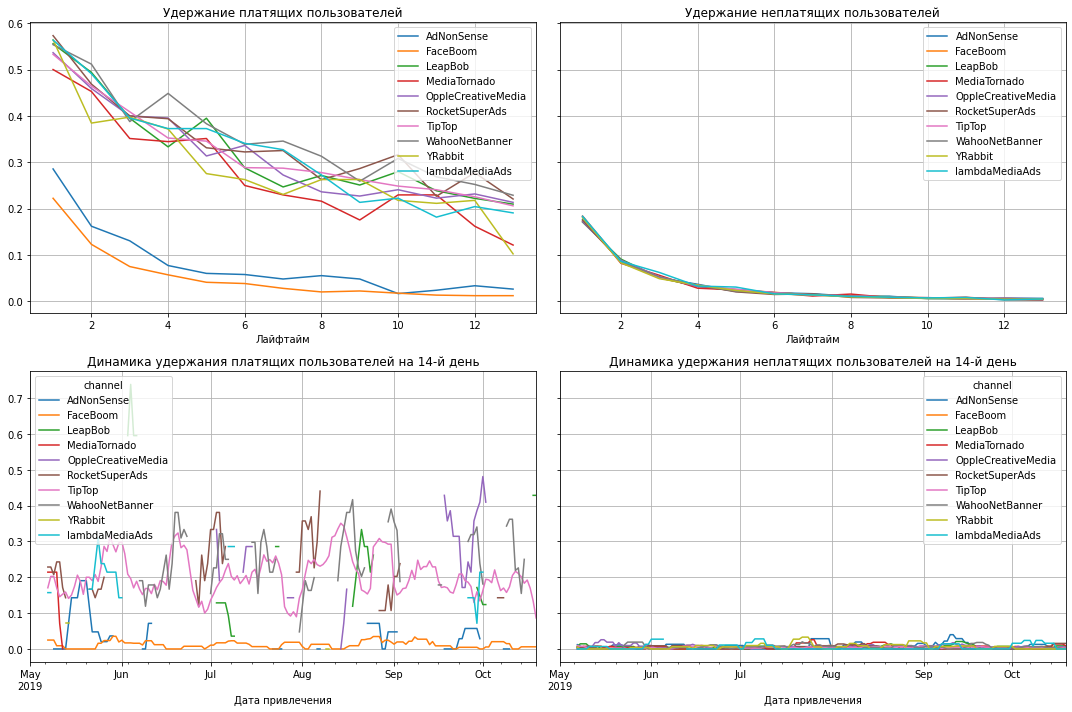

In [37]:
# смотрим удержание с разбивкой по каналам
dimensions = ['channel']


retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days,dimensions=dimensions

)

plot_retention(retention_grouped, retention_history, horizon_days) 

Низкий процент удержания по каналу FaceBoom и AdNonSense.

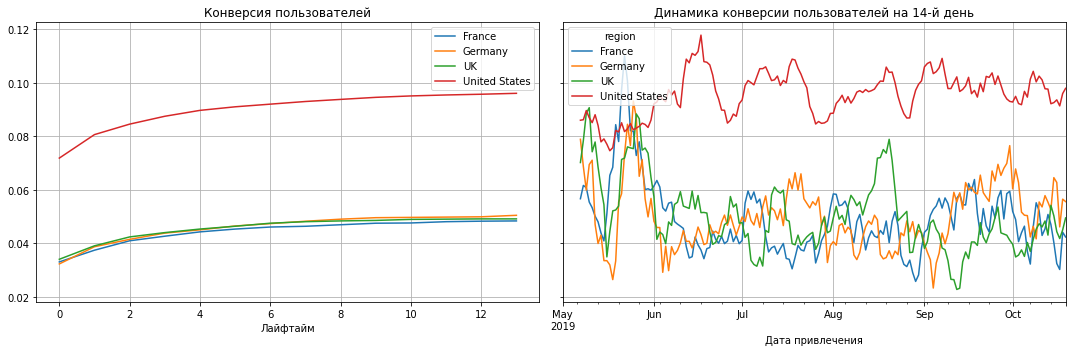

In [38]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['region']


conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Высокая конверсия пользователей в США.

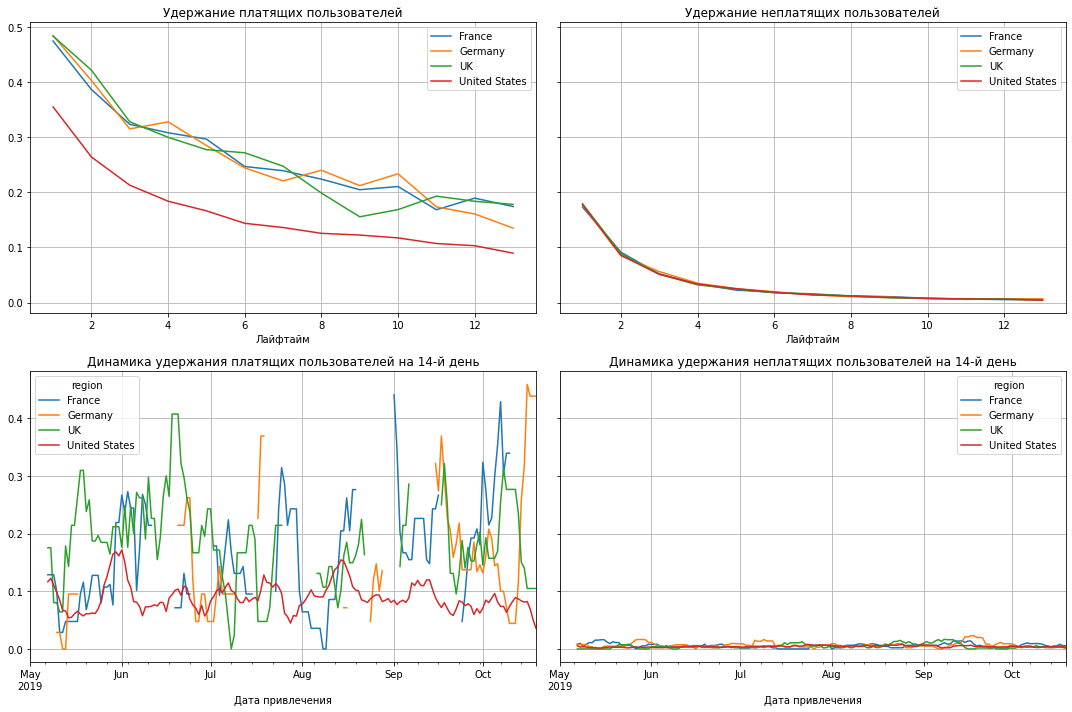

In [39]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['region']


retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days,dimensions=dimensions

)

plot_retention(retention_grouped, retention_history, horizon_days) 

Обратная ситуация с удержанием. Пользователи США наименее удерживаемы.

**Моя заморочка. Интересно глянуть на данные по трем убыточным каналам.**

In [40]:
profiles = profiles.query('channel != "TipTop"') 
#"TipTop",  "FaceBoom", "AdNonSense" посмотрел по каждому каналу окупаемость
# 

In [41]:
# группируем по каналу и вычисляем долю платящих пользователей
profiles.groupby('channel').agg({'payer': 'mean', 'user_id' : 'nunique'}).sort_values(by = 'payer', ascending = False)

,payer,user_id
channel,,
FaceBoom,0.122,29144
AdNonSense,0.113,3880
lambdaMediaAds,0.105,2149
RocketSuperAds,0.079,4448
WahooNetBanner,0.053,8553
YRabbit,0.038,4312
MediaTornado,0.036,4364
LeapBob,0.031,8553
OppleCreativeMedia,0.027,8605


In [42]:
# группируем по устройству и вычисляем долю платящих пользователей
profiles.groupby('device').agg({'payer': 'mean', 'user_id' : 'nunique'}).sort_values(by = 'payer', ascending = False)

,payer,user_id
device,,
Mac,0.089,13873
iPhone,0.086,25042
Android,0.076,17952
PC,0.064,17141


In [43]:
# считаем средний CAC по каналам привлечения

cac = (
    profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
    .sort_values(by = 'cac', ascending = False)
)

cac

,cac
channel,
FaceBoom,1.113
AdNonSense,1.008
lambdaMediaAds,0.725
WahooNetBanner,0.602
RocketSuperAds,0.412
OppleCreativeMedia,0.250
YRabbit,0.219
MediaTornado,0.219
LeapBob,0.210


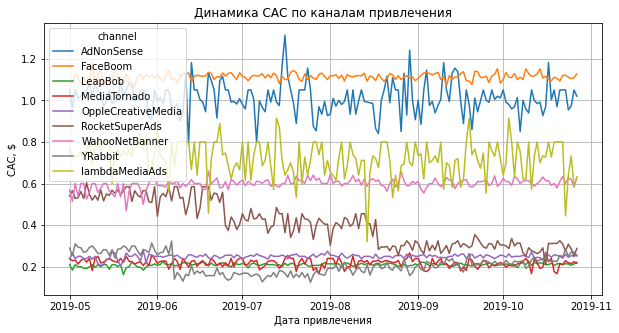

In [44]:
# строим график истории изменений CAC по каналам привлечения

profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

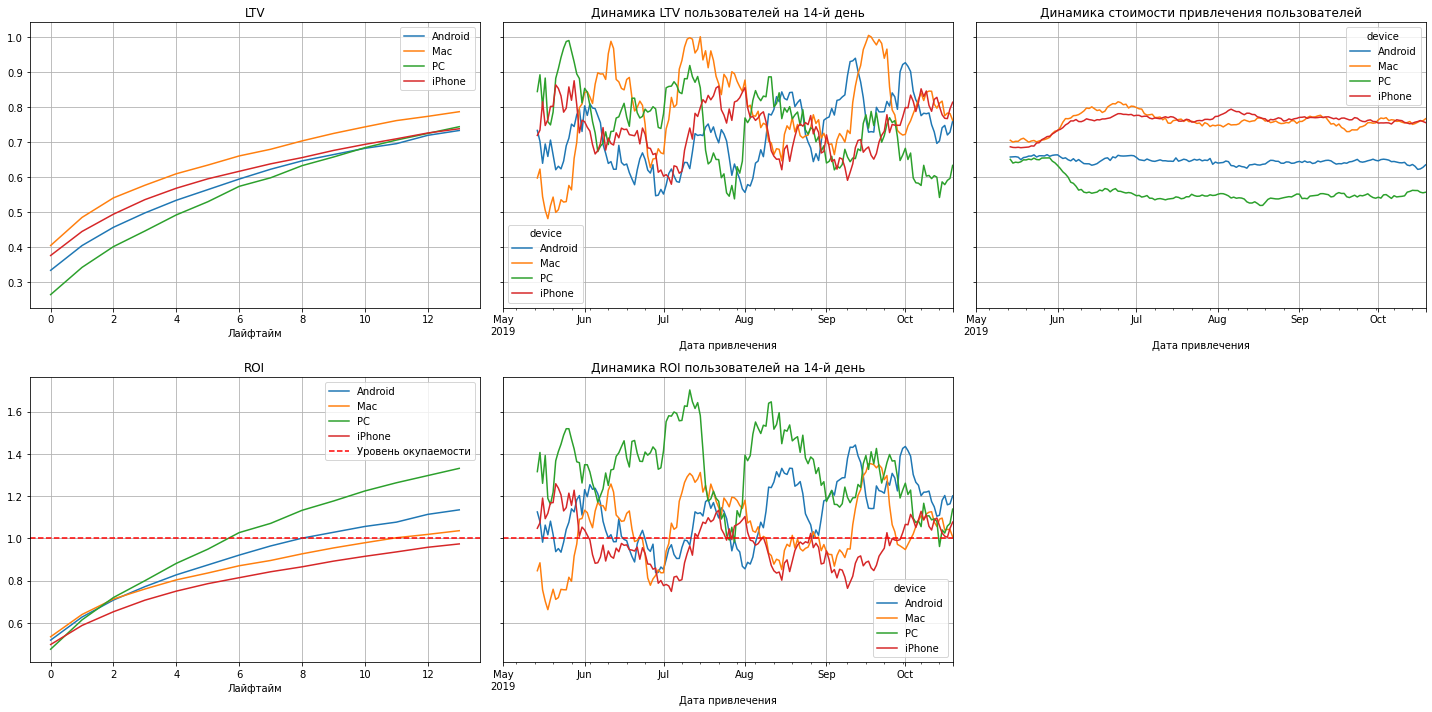

In [45]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

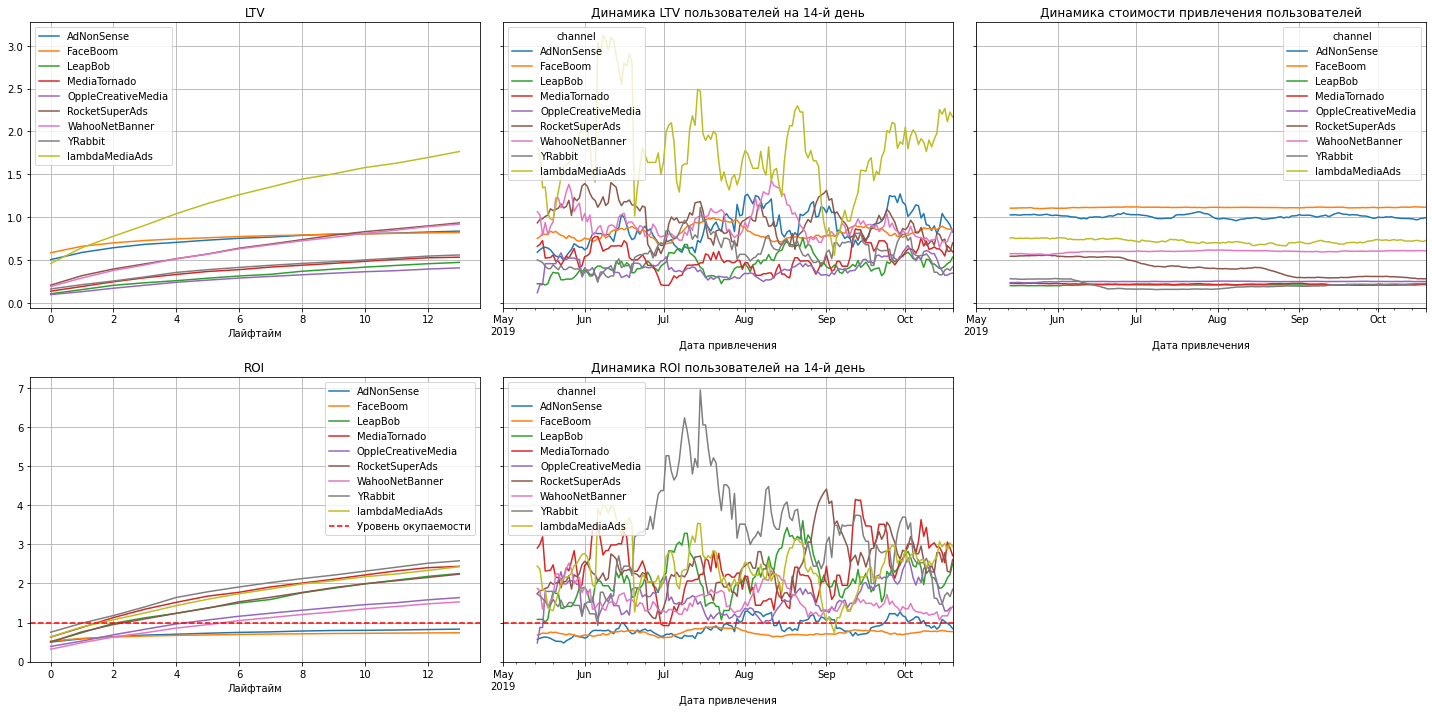

In [46]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

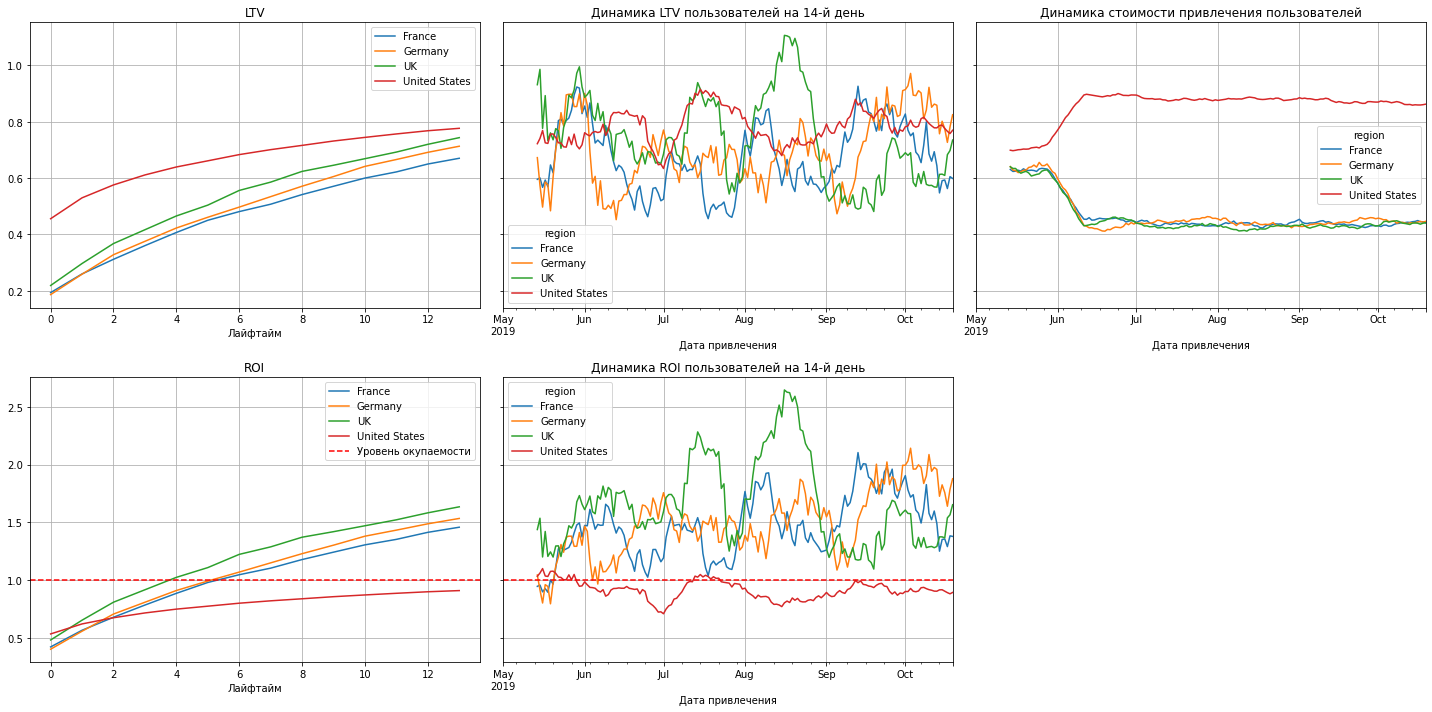

In [47]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

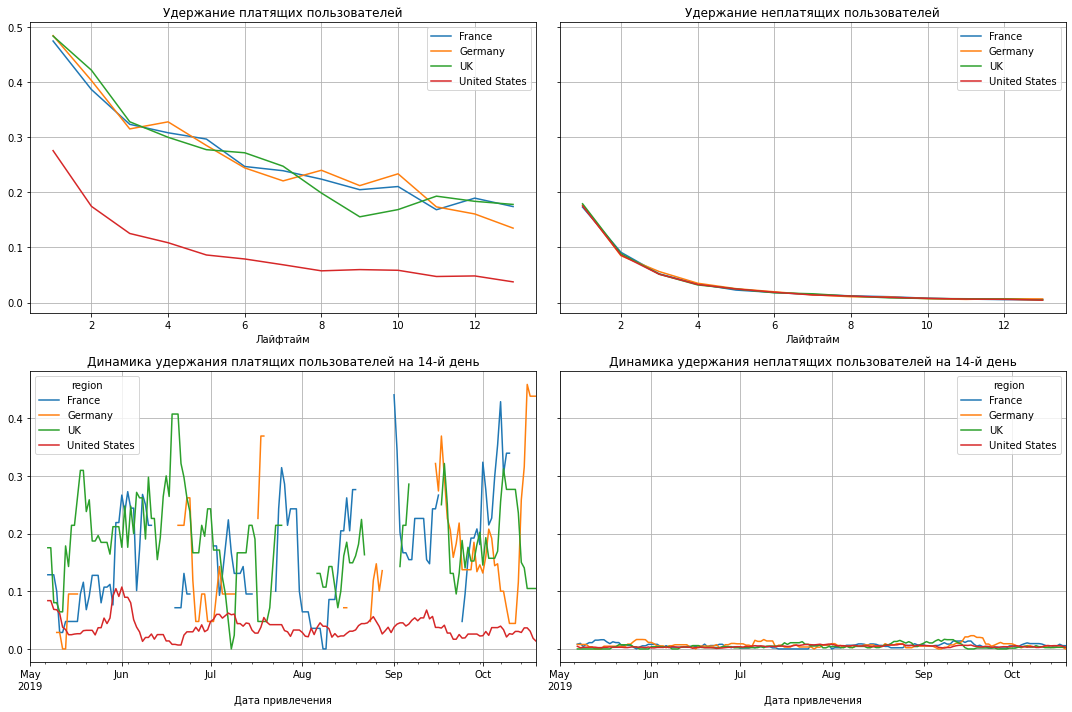

In [48]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['region']


retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days,dimensions=dimensions

)

plot_retention(retention_grouped, retention_history, horizon_days) 

По итогу выяснил, что TipTop и FaceBoom используется только в США и убыточен на всех девайсах. AdNonSense используется в Европейских странах и тоже убыточен на всех устройствах.

# Шаг 6. Выводы

Основной покупатель живет в США и большая доля привлеченных пользователей становится покупателями.
Максимальное количество пользователей заходит с iPhone. Доля платящих выше для пользователей Mac.
В лидерах FaceBoom, AdNonSense, lambdaMediaAds по доле платящих.
Самые высокие затраты на маркетинг по каналам TipTop, AdNonSense, FaceBoom.
Картина окупаемости исходя из устройства схожая с общей окупаемостью, за исключением того, что затраты на рекламу окупаемы по пользователям PC к 14-му дню.
Стоимость привелечения пользователей в США постоянно растет, что однако не сказывается на окупаемости, По европейским странам САС стабилен, затраты на рекламу окупаются. То есть убытки приносят только пользователи США.
Затраты по каналу TipTop излишни и не приводят к пропорциональному росту окупаемости. Не окупаются также затраты на рекалум по каналам ADNonSense и FaceBoom. 
Наибольшая конверсия по iPhоne и Mac. Что однако не ведет к окупаемости. Видна связь между увеличением трат по каналу TipTop  в январе и увеличением конверсии по пользователям iPhоne и Mac. Дальнейшее увеличение расходов не приводит к такому же росту, конврсия в целом дальше стабильна.
Не смотря на более низкую конверсию пользователей PC удерживаются они лучше других пользователей в разрезе по устройствам.
В лидерах каналы ADNonSense, LambdaMediaAds, FaceBoom, TipTop по конверсии. 
Низкий процент удержания по каналу FaceBoom и AdNonSense.
Высокая конверсия пользователей в США.
Обратная ситуация с удержанием. Пользователи США наименее удерживаемы (как раз по убыточным каналам).

Причины неэффективности.
Каналы TipTop, FaceBoom в США и AdNonSense в Европе неокупаемы, несмотря на увеличение расходов на маркетинг. К тому же по данным каналам низкое удержание пользователей.

Рекомендации.
Необходимо пересмотреть маркетинг в отношении каналов TipTop, FaceBoom поскольку высока доля покупателей пришелших через эти каналы. От AdNonSense возможно стоит отказаться, доля покупателей невысокая.
Стоит обратить внимание на каналы LeapBob и OppleCreativeMedia. Немалое количество пользователей, невысокие затраты на маркетинг и приличная окупаемость.